# Homework 1, 23 Jan 2016

## Analysis on Murder Data

In [3]:
import pandas as pd

killings = pd.read_csv('/Users/zachang/Desktop/Data Science Course/DAT1/SG_DAT1/homework/data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'})

In [5]:
# 2. Show the count of missing values in each column

len(killings.index)- killings.count()

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           4
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [6]:
# 3. replace each null value in the dataframe with the string "Unknown"


null_Ind=killings.streetaddress.isnull()
killings[null_Ind]

killings.fillna('Unknown',inplace=True)
killings[null_Ind]


,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
50,50,Billy Patrick,29,Male,White,April,26,2015,Unknown,Bunch,OK,Oklahoma Department of Wildlife Conservation,Gunshot,Firearm,32556
280,280,Kenneth Brown,18,Male,White,January,4,2015,Unknown,Guthrie,OK,Oklahoma State Police,Gunshot,Non-lethal firearm,53591
379,379,Ricky Hall,27,Male,Black,March,30,2015,Unknown,Fort Meade,MD,NSA Police Department,Gunshot,Firearm,87430
405,405,Santos 'Cuate' Cortez Hernandez,24,Male,Hispanic/Latino,April,20,2015,Unknown,Mission,TX,Hidalgo County Sheriff's Office,Gunshot,Firearm,34146


In [7]:
# 4. How many killings were there so far in 2015?

killings.year.describe()
print len(killings.year)

467


In [8]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [9]:
# 6. How many killings were of unarmed people?

no_unarmed = killings.armed.value_counts()['No']

print no_unarmed

102


In [10]:
# 7. What percentage of all killings were unarmed?

round(float(no_unarmed)/len(killings.armed)  *100, 2)


21.84

In [11]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts()[0:5]

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [14]:
# 9. Show a value counts of deaths for each race

killings.raceethnicity.value_counts()

## Rename didn't work! 


White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

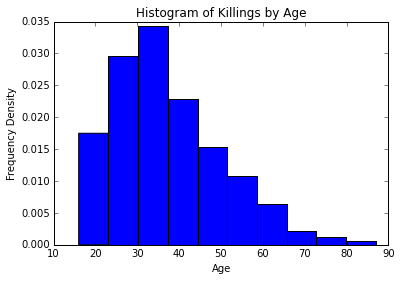

In [10]:
# 10. Display a histogram of ages of all killings

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.hist(killings.age,color='blue',normed=True)
plt.title("Histogram of Killings by Age")
plt.xlabel("Age")
plt.ylabel("Frequency Density")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d075b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e577350>]], dtype=object)

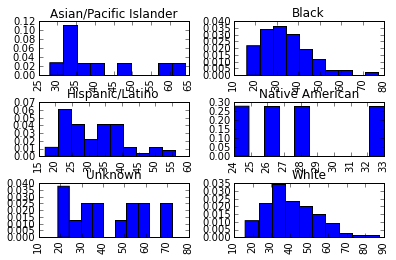

In [67]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by=killings.raceethnicity, sharex = False, sharey = False ,normed=True)



In [29]:
# 12. What is the average age of death by race?

killings.groupby('raceethnicity').age.mean()

raceethnicity
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

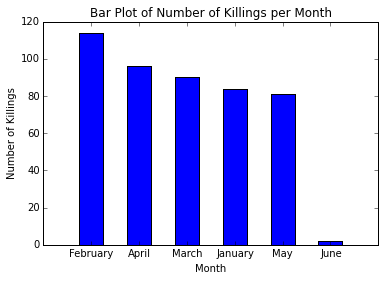

In [154]:
# 13. Show a bar chart with counts of deaths every month


pltheight=np.array(killings.month.value_counts())

mth=killings.month.unique()
ind = np.arange(len(mth))
width = 0.5

plt.bar(ind,pltheight,width=width,align='center')
plt.xticks(ind,mth)
plt.xlabel("Month")
plt.ylabel("Number of Killings")
plt.title("Bar Plot of Number of Killings per Month")

## Analysis on College Majors Data

In [4]:
majors = pd.read_csv('/Users/zachang/Desktop/Data Science Course/DAT1/SG_DAT1/homework/data/college-majors.csv')
majors.head()





,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [5]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors.drop(['Employed_full_time_year_round','Major_code'],axis=1)
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [6]:
# 2. Show the count of missing values in each column

majors.isnull().sum()

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [7]:
# 3. What are the top 10 highest paying majors?

## Take this to mean, "Going by the median salaries, what are the top 10 highest paying majors"

len(majors.Major.unique()) - len(majors)

## All Degrees in the dataset are unique. 

top10 = majors.groupby('Major').Median.mean().sort_values(ascending=False).head(10)
print "The top 10 highest paying majors are:"

for i in range(len(top10)):
    print top10.index[i]



The top 10 highest paying majors are:
PETROLEUM ENGINEERING
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION
NAVAL ARCHITECTURE AND MARINE ENGINEERING
METALLURGICAL ENGINEERING
NUCLEAR ENGINEERING
MINING AND MINERAL ENGINEERING
MATHEMATICS AND COMPUTER SCIENCE
ELECTRICAL ENGINEERING
CHEMICAL ENGINEERING
GEOLOGICAL AND GEOPHYSICAL ENGINEERING


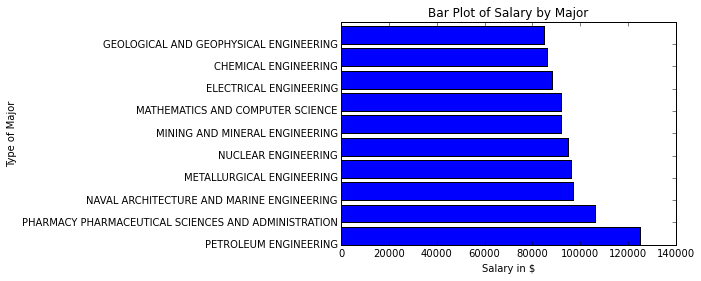

In [16]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

plt.barh(np.arange(len(top10)),top10,align='edge')
plt.yticks(np.arange(len(top10)),np.array(top10.index))
plt.ylabel("Type of Major")
plt.xlabel("Salary in $")
plt.title("Bar Plot of Salary by Major")

## Labels are all screwy

In [17]:
# 5. What is the average median salary for each major category?

## Take this to mean "What is the average of the median salaries across the respective major categories?"

majors.groupby('Major_category').Median.mean()


Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [18]:
# 6. Show only the top 5 paying major categories

## Take this to mean "Show top 5 major paying categories, by the average of the median salary for each category"

t5 = majors.groupby('Major_category').Median.mean().sort_values(ascending=False).head(5)

print "The top 5 highest paying major categories are:"

for i in range(len(t5)):
    print t5.index[i]


The top 5 highest paying major categories are:
Engineering
Computers & Mathematics
Physical Sciences
Business
Health


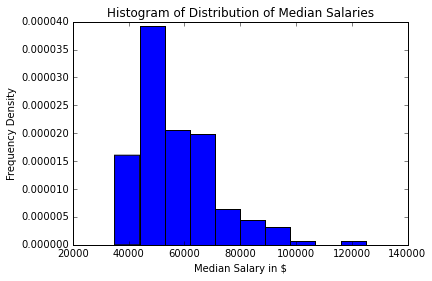

In [11]:
# 7. Plot a histogram of the distribution of median salaries

plt.hist(majors.Median,color='blue',normed=True)
plt.title("Histogram of Distribution of Median Salaries")
plt.xlabel("Median Salary in $")
plt.ylabel("Frequency Density")

In [62]:
# 8. Plot a histogram of the distribution of median salaries by major category

## Take this to be "Plot histograms of distribution of median salaries by major category"

majors.Major_category.value_counts()

MajInd = majors.Major_category.value_counts().index

## Take first 5 categories only since number for each group is small

In [20]:

'''Tried...
##plt.figure()
for i in range(1,5):
    plt.subplot(5,1,i)
    x = np.array(majors.Median[majors.Major_category==MajInd[i-1]])
    plt.hist(x,bin=5,normed=True)
    
plt.show()

## Doesn't really work out... '''



"Tried...\n##plt.figure()\nfor i in range(1,5):\n    plt.subplot(5,1,i)\n    x = np.array(majors.Median[majors.Major_category==MajInd[i-1]])\n    plt.hist(x,bin=5,normed=True)\n    \nplt.show()\n\n## Doesn't really work out... "

ValueError: x has only one data point. bins or range kwarg must be given

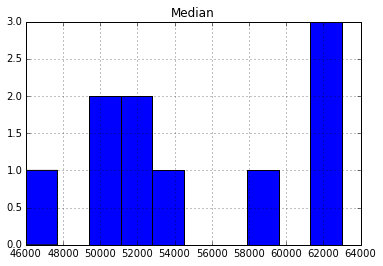

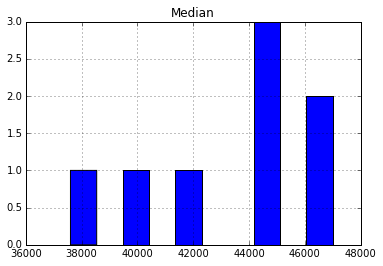

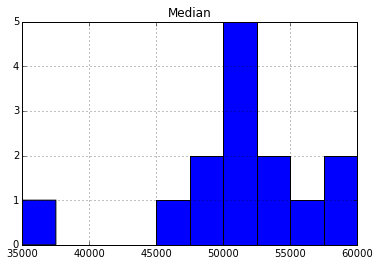

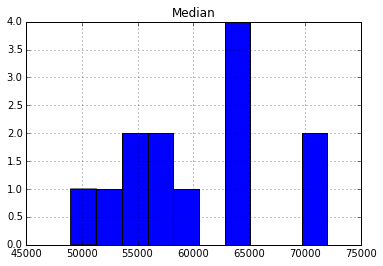

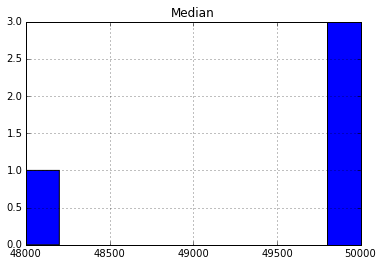

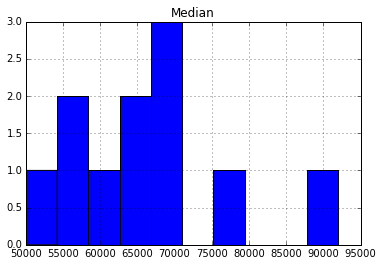

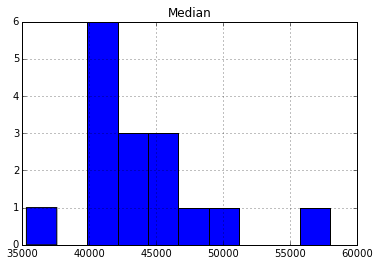

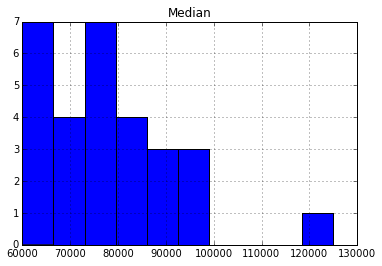

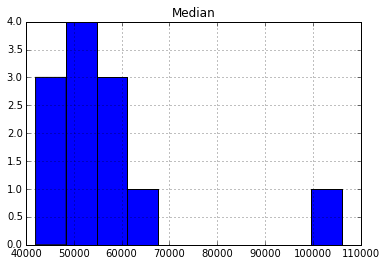

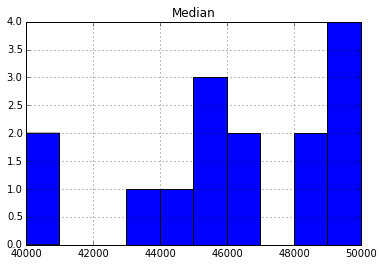

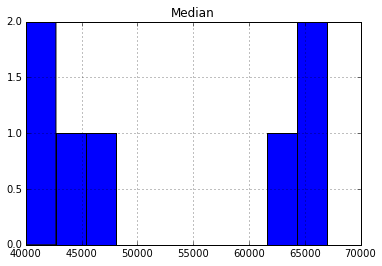

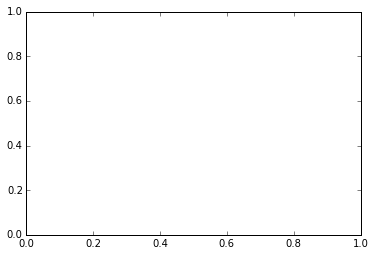

In [21]:
majors.groupby('Major_category').hist('Median')
## Courtesy of Adam

In [80]:
# 9. What are the top 10 most UNemployed majors?
# What are the unemployment rates?

majors[['Major','Unemployment_rate','Unemployed']].sort_values(by='Unemployed',ascending=False).head(10)

,Major,Unemployment_rate,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,0.058865,147261
158,GENERAL BUSINESS,0.051378,85626
114,PSYCHOLOGY,0.069667,79066
159,ACCOUNTING,0.053415,75379
13,COMMUNICATIONS,0.064360,54390
73,ENGLISH LANGUAGE AND LITERATURE,0.068645,52248
164,MARKETING AND MARKETING RESEARCH,0.055033,51839
132,POLITICAL SCIENCE AND GOVERNMENT,0.069374,40376
25,GENERAL EDUCATION,0.043904,38742
78,BIOLOGY,0.059301,36757


In [82]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate']= majors['Employed']/majors['Total']


,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000,0.711738
5,5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000,0.793902
6,6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000,0.747950
7,7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000,0.747690
8,8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000,0.825608
9,9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000,0.694458


In [84]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate']=1-majors['sample_employment_rate']
